In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
sns.set(font="Malgun Gothic")

%config InlineBackend.figure_format='retina'

In [4]:
df_raw=pd.read_csv("D:/Download/data/train.csv",encoding="cp949")
df_raw.shape

(9917530, 54)

In [5]:
df_use = df_raw.loc[:,['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance']]
df_use = df_use.fillna(0)
df_use = df_use[df_use.prop_starrating==1]
df_use = df_use[df_use.prop_review_score>0]
df_use = df_use[df_use.prop_log_historical_price>0]
df_use = df_use[df_use.prop_location_score1>0]
df_use.shape

(24276, 25)

In [6]:
df_ud=pd.read_csv("usedata.csv",encoding="cp949")

In [9]:
df_final=pd.concat([df_use,df_ud],ignore_index=True)
df_final.shape

(5039069, 26)

In [10]:
df_final.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,Unnamed: 0


In [11]:
df_final=df_final.drop('Unnamed: 0',axis=1)
df_final.shape

(5039069, 25)

In [12]:
df_final.sample(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance
2563774,338394,2013-04-01 16:17:39,5,219,0.0,0.00,219,77089,3,3.5,...,1,8192,1,2,4,0,2,0,0.0,0.00
937273,120937,2013-01-22 17:01:17,5,219,0.0,0.00,219,38758,3,3.5,...,0,13870,4,220,2,0,1,1,0.0,808.61
3261828,430761,2012-12-17 10:40:06,5,219,3.0,118.21,219,59782,4,4.5,...,0,23090,1,1,2,0,1,0,0.0,243.94
4491325,592862,2013-05-30 06:58:36,5,219,0.0,0.00,219,85495,3,3.0,...,0,9137,1,16,2,0,1,1,0.0,43.13
3773483,498199,2013-04-18 08:29:37,5,219,0.0,0.00,219,45977,3,3.5,...,0,8635,2,1,4,2,2,1,0.0,268.67
1484273,194177,2012-12-31 07:57:52,5,219,0.0,0.00,219,59050,3,4.0,...,0,24398,1,9,2,0,1,0,0.0,156.25
3826055,505067,2013-04-17 15:51:40,15,55,0.0,0.00,55,17565,4,4.5,...,0,23779,2,164,1,0,1,1,0.0,0.00
1066225,138271,2012-11-26 22:17:26,5,219,0.0,0.00,219,51899,1,3.5,...,0,10446,2,30,2,0,1,0,0.0,327.56
2757125,363978,2013-03-28 21:06:10,5,219,0.0,0.00,219,125488,3,4.0,...,0,27620,1,2,2,0,1,1,0.0,97.37
1606785,210589,2013-04-21 07:22:38,5,219,0.0,0.00,219,70934,4,4.5,...,0,4562,1,3,1,1,1,0,0.0,260.17


In [13]:
df_test=df_final.sample(2000000)
df_test.shape

(2000000, 25)

In [15]:
drop_list=df_test.index.tolist()
drop_list

[3634107,
 2847960,
 589845,
 2651767,
 4556491,
 658707,
 722193,
 3241464,
 2563112,
 4744829,
 1201669,
 359897,
 3811548,
 3612495,
 2516162,
 2611765,
 3776029,
 4288342,
 2640858,
 4895518,
 4048848,
 740861,
 3318598,
 2069116,
 3564805,
 4810479,
 4586275,
 2517221,
 2986303,
 493449,
 4908745,
 2967821,
 2446143,
 3475385,
 4123619,
 1485714,
 3661441,
 3226415,
 3109733,
 321192,
 3134272,
 2401427,
 3869705,
 2890676,
 345679,
 3954864,
 1916244,
 3102286,
 2493292,
 4568112,
 4902822,
 1325661,
 123422,
 4247724,
 4159726,
 2638825,
 2920655,
 1174947,
 3703388,
 2871519,
 4084617,
 2037576,
 4692309,
 4721361,
 3968287,
 4313899,
 2846366,
 3592875,
 4736616,
 527514,
 70548,
 2401032,
 4474000,
 915439,
 716482,
 4916556,
 24147,
 2119528,
 2830785,
 4690667,
 2644168,
 2676654,
 2612389,
 340272,
 4578640,
 248602,
 1576508,
 2073771,
 3188452,
 1863193,
 2806759,
 4129629,
 2664555,
 1121969,
 2154012,
 85803,
 2307994,
 4295186,
 2961170,
 2417090,
 4099990,
 985134,
 

In [18]:
df_train=df_final.drop(drop_list,axis=0)
df_train.shape

(3039069, 25)

In [20]:
df_test.shape

(2000000, 25)

In [21]:
df_train.to_csv("hotel_train.csv", mode='w')
df_test.to_csv("hotel_test.csv", mode='w')

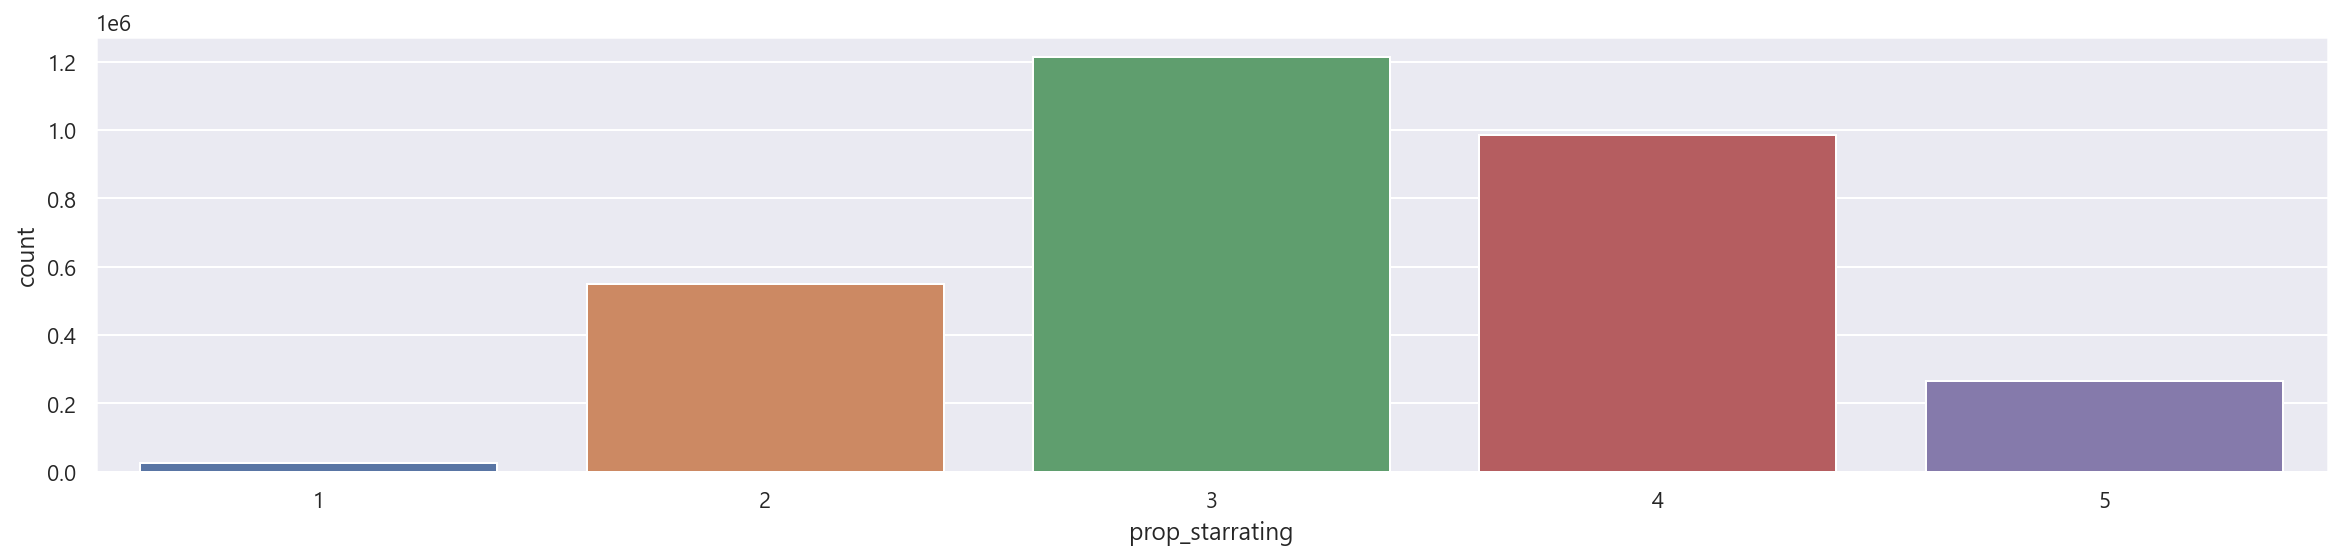

In [22]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_train, x="prop_starrating")
plt.show()

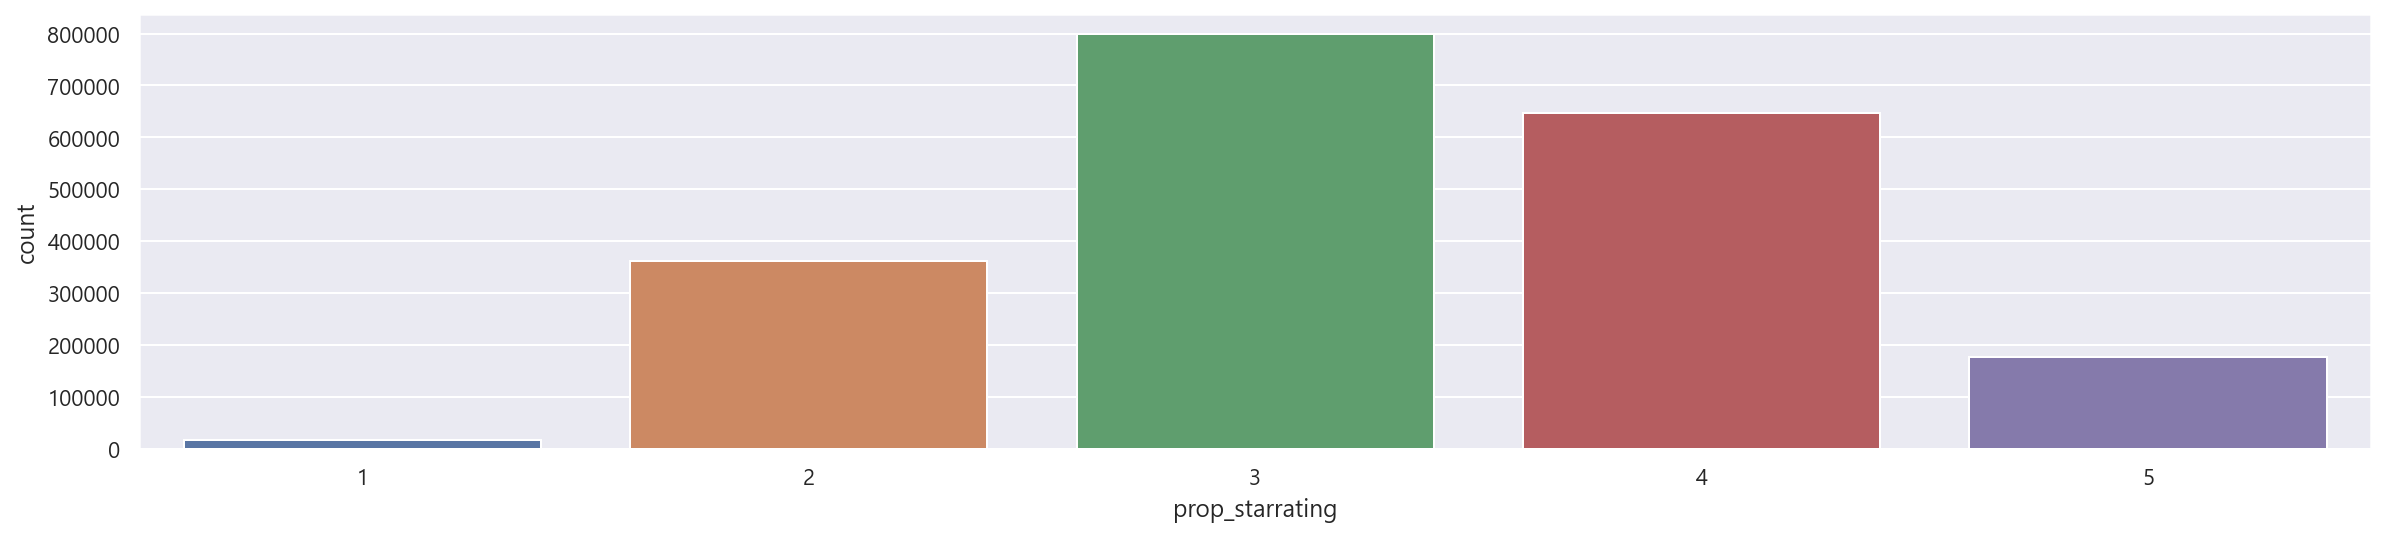

In [23]:
plt.figure(figsize=(20,4))
sns.countplot(data=df_test, x="prop_starrating")
plt.show()